json读取测试

In [1]:
    a = [   {
            "image": "./imagesTr/287_roi.nii.gz",
            "label": "./labelsTs/287_roi.nii.gz"
        },
        {
            "image": "./imagesTr/90_roi.nii.gz",
            "label": "./labelsTs/90_roi.nii.gz"
        },
        {
            "image": "./imagesTr/125_roi.nii.gz",
            "label": "./labelsTs/125_roi.nii.gz"
        },
        {
            "image": "./imagesTr/284_roi.nii.gz",
            "label": "./labelsTs/284_roi.nii.gz"
        },
        {
            "image": "./imagesTr/173_roi.nii.gz",
            "label": "./labelsTs/173_roi.nii.gz"
        }
    ]

In [2]:
image = []
label = []
for i in a:
    image.append(i["image"])
    label.append(i["label"])

In [3]:
image

['./imagesTr/287_roi.nii.gz',
 './imagesTr/90_roi.nii.gz',
 './imagesTr/125_roi.nii.gz',
 './imagesTr/284_roi.nii.gz',
 './imagesTr/173_roi.nii.gz']

nii文件读取显示

In [4]:
import SimpleITK as sitk
img_path = '/home/dxm/dxm/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task100_mycardium/imagesTr/43_roi_0000.nii.gz'
img = sitk.ReadImage(img_path)
img = sitk.GetArrayFromImage(img)

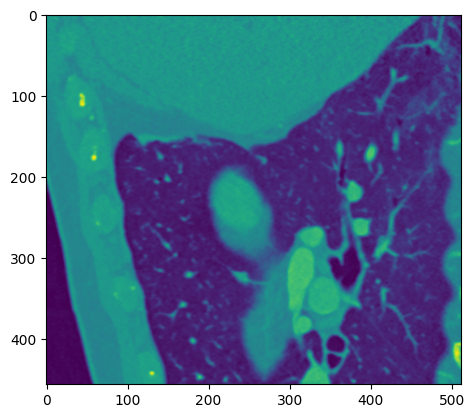

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
plt.imshow(img[:,:,52])

In [6]:
# 从nii到sitk
img = sitk.GetImageFromArray(img)
img
 

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x7f3be024aa50> >

In [7]:
img_dir = '/home/dxm/dxm/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task100_mycardium'
annotations_file = 'dataset.json'
from pathlib import Path
import json
import os
anno_path = os.path.join(img_dir,"dataset.json")
with open(anno_path) as f:
    annotation = json.load(f)["training"]
# self.image = []
# self.img_labels = []
# for i in annotation:
# self.image.append(i["image"])
# self.img_labels.append(i["label"])
# print(self.image)
# print(self.img_labels)
# self.img_dir = img_dir
# self.transform = transform
# self.target_transform = target_transform

In [15]:
import os
import json
import torch
import torch.utils.data as data
from torchvision.io import read_image
import SimpleITK as sitk
import numpy as np
"""
img_dir = '/home/dxm/dxm/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task100_mycardium'
annotations_file = 'dataset.json'
"""

def build_dataloader(img_dir, batch_size = 8, train = True, transform=None, target_transform=None):
    """
    return dataloader
    """
    loader = data.DataLoader(ct_dataset(img_dir = img_dir, train = train), batch_size=batch_size, shuffle=True,
                    num_workers = 8,pin_memory=False)
    return loader


class ct_dataset(data.Dataset):
    def __init__(self, img_dir, train = True, transform=None, target_transform=None):
        self.img_dir = img_dir
        if train:
            with open(os.path.join(img_dir,"dataset.json")) as f:
                annotation = json.load(f)["training"]
                self.image = []
                self.img_labels = []
                for i in annotation:
                    self.image.append(i["image"].replace("roi","roi_0000") )
                    self.img_labels.append(i["label"])
        else:
            with open(os.path.join(img_dir,"dataset.json")) as f:
                annotation = json.load(f)["test"]
                self.image = annotation
                self.img_labels = []
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.image[idx])
        label_path = os.path.join(self.img_dir, self.img_labels[idx])
        img = sitk.ReadImage(img_path)
        img = sitk.GetArrayFromImage(img).astype(float)
        label = sitk.ReadImage(label_path)
        label = sitk.GetArrayFromImage(label).astype(float)
        img = np.pad(img, ((512 - img.shape[0],0),(0,0), (0,0)), 'constant')
        label = np.pad(label, ((512 - img.shape[0],0), (0,0), (0,0)), 'constant')
        # if self.transform:
        #     image = self.transform(image)
        # if self.target_transform:
        #     label = self.target_transform(label)
        return img, label    

In [19]:
img_dir = '/home/dxm/dxm/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task100_mycardium'
dataloader = build_dataloader(img_dir = img_dir,batch_size=1)
for img, label in dataloader:
    print(img)

tensor([[[[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          ...,
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00]],

         [[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          ...,
     

ValueError: Caught ValueError in DataLoader worker process 2.
Original Traceback (most recent call last):
  File "/data1/dxm/anaconda3/envs/torch112/lib/python3.9/site-packages/torch/utils/data/_utils/worker.py", line 302, in _worker_loop
    data = fetcher.fetch(index)
  File "/data1/dxm/anaconda3/envs/torch112/lib/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 49, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/data1/dxm/anaconda3/envs/torch112/lib/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 49, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/tmp/ipykernel_571251/4011789122.py", line 51, in __getitem__
    img = np.pad(img, ((512 - img.shape[0],0),(0,0), (0,0)), 'constant')
  File "<__array_function__ internals>", line 180, in pad
  File "/data1/dxm/anaconda3/envs/torch112/lib/python3.9/site-packages/numpy/lib/arraypad.py", line 743, in pad
    pad_width = _as_pairs(pad_width, array.ndim, as_index=True)
  File "/data1/dxm/anaconda3/envs/torch112/lib/python3.9/site-packages/numpy/lib/arraypad.py", line 514, in _as_pairs
    raise ValueError("index can't contain negative values")
ValueError: index can't contain negative values


In [ ]:
import os, sys
sys.path.insert(0, os.path.dirname(pathlib.Path(__file__).parent.absolute())   )


In [4]:
import os
os.path.join("ckpt", "epoch_" + str(1) + "_.pt")

'ckpt/epoch_1_.pt'

In [32]:
from utils.metric import DiceScore
dicescore = DiceScore().cuda()

In [33]:
dicescore

DiceScore()

In [34]:
import torch
preds  = torch.tensor([2, 0, 2, 1])
target = torch.tensor([1, 1, 2, 0])
a = dicescore(preds, target)
print(a)

None


In [35]:
print(1)

1


In [51]:
class DiceScore(torch.nn.Module):
    def __init__(self, smooth=1):
        super(DiceScore, self).__init__()
        self.smooth = smooth

    def forward(self, logits, targets, sigmoid=True):
        num = targets.size(0)

        probs = torch.sigmoid(logits)
        m1 = probs.view(num, -1) > 0.5
        m2 = targets.view(num, -1) > 0.5
        intersection = m1 * m2

        score = (
            2.0
            * (intersection.sum(1) + self.smooth)
            / (m1.sum(1) + m2.sum(1) + self.smooth)
        )
        score = score.sum() / num
        return score

In [58]:
score = DiceScore().cuda()
preds  = torch.tensor([1, 0, 1, 1])
target = torch.tensor([1, 1, 0, 0])
a = score(preds, target)

In [59]:
a

tensor(1.0833)

In [63]:
import torch
CUDA_VISIBLE_DEVICES="1"
torch.load('ckpt/epoch_40_.pt')

RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.